## <center>Практическая часть<a class="anchor" id="practice"></a><center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype=np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=np.float64)

In [3]:
X

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [4]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [5]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [6]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])

In [7]:
X_st

array([[ 1.        ,  1.        , -0.97958969,  1.        ],
       [ 1.        ,  1.        , -0.56713087,  1.        ],
       [ 1.        ,  2.        , -0.46401617,  2.        ],
       [ 1.        ,  5.        , -0.77336028,  1.        ],
       [ 1.        ,  3.        ,  0.97958969,  2.        ],
       [ 1.        ,  0.        , -0.36090146,  1.        ],
       [ 1.        ,  5.        ,  1.08270439,  3.        ],
       [ 1.        , 10.        ,  2.11385144,  3.        ],
       [ 1.        ,  1.        , -1.08270439,  1.        ],
       [ 1.        ,  2.        ,  0.05155735,  2.        ]])

## Домашнее задание <a class='anchor' id='hw'>

1. *Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [8]:
#Добавлю к функции некоторую погрешность которая будет добавляться к нулю и вычитаться от одного соответственно в списке. Переменную погрешности зашью в функции
def calc_logloss(y, y_pred):
    eta = 1e-10
    for i in range(len(y_pred)):
        if y_pred[i] == 1:
            y_pred[i] -= eta
        elif y_pred[i] == 0:
            y_pred[i] += eta
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [9]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.8, 0.1])
calc_logloss(y1, y_pred1)

0.164252033486018

In [10]:
# Плохой пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0])
calc_logloss(y1, y_pred1)

0.052680257878913145

In [11]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [12]:
z = np.linspace(-10, 10, 101)

In [13]:
probabilities = sigmoid(z)

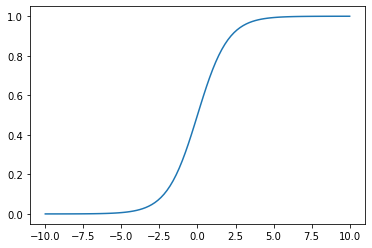

In [14]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [15]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [16]:
#Показалось непростым подобрать т.к при малых значениях logloss скатывается, а при больших падает в -11 степень что судя по всему и есть оптимал
W = eval_model(X_st, y, iterations=500, eta=980)


0 [ -371.30243002 -1421.9967344    -26.18512172  -553.3003134 ] 1.1785958344356262
50 [-1653.51322184 -2124.42674461  1043.72687554  3252.26968225] 39.749726526954404
100 [-3098.87347255 -1021.91353918   256.66428164  4256.88131228] 33.94100176010607
150 [-4654.63613479 -1979.80373549  -551.94805604  4380.53463429] 6.907755254220028
200 [-5553.59519285  -918.26637948  -944.31726966  4952.07199255] 4.696660006687695
250 [-6138.98869163  -843.75414367 -1353.89721336  5286.11487819] 4.605170169500019
300 [-6165.35715168  -870.12260502 -1577.97898946  5259.74641986] 2.3025850847900093
350 [-6202.92493207  -849.27807165 -1557.91442864  5398.38479899] 7.00004942934568e-11
400 [-6202.92493158  -849.27807361 -1557.91442822  5398.38480095] 7.00004942934568e-11
450 [-6202.92493109  -849.27807557 -1557.91442779  5398.38480291] 7.00004942934568e-11


C:\Users\nikit\AppData\Local\Temp/ipykernel_14148/1761986473.py:2: RuntimeWarning: overflow encountered in exp
  res = 1 / (1 + np.exp(-z))


3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [17]:
def calc_pred_proba(w, X):

    y_pred_proba = sigmoid(np.dot(X, w))
    return y_pred_proba

print(calc_pred_proba(W, X_st))

[3.46763212e-056 0.00000000e+000 1.00000000e+000 0.00000000e+000
 1.00000000e+000 5.97445282e-106 1.00000000e+000 0.00000000e+000
 1.00000000e+000 1.00000000e+000]


C:\Users\nikit\AppData\Local\Temp/ipykernel_14148/1761986473.py:2: RuntimeWarning: overflow encountered in exp
  res = 1 / (1 + np.exp(-z))


4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [18]:
def calc_pred(w, X):

    m = X.shape[0]
    y_pred = np.zeros(m)
    A = sigmoid(np.dot(X, w))
    # За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[0]):
        if (A[i] > 0.5):
            y_pred[i] = 1
        elif (A[i] <= 0.5):
            y_pred[i] = 0
    return y_pred

print(calc_pred(W, X_st))

[0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]


C:\Users\nikit\AppData\Local\Temp/ipykernel_14148/1761986473.py:2: RuntimeWarning: overflow encountered in exp
  res = 1 / (1 + np.exp(-z))


5. *Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.

In [22]:
#Сначала делаю функцию для Accuracy, потом матрицу ошибок и через нее все остальные метрики
def accuracy(y, y_pred):
    true_answ = 0
    if len(y) == len(y_pred):
        for i in range(len(y)):
            if y[i] == y_pred[i]:
                true_answ += 1
        return true_answ/len(y)
    else:
        print("y length is different from y_pred length. Calculate of metrics is impossible")

def err_matrix(y, y_pred):
    tp, tn, fp, fn = 0, 0, 0, 0
    if len(y) == len(y_pred):
        for i in range(len(y)):
            if y[i] == 1 and y_pred[i] == 1:
                tp += 1
            elif y[i] == 1 and y_pred[i] == 0:
                fn += 1
            elif y[i] == 0 and y_pred[i] == 0:
                tn += 1
            elif y[i] == 0 and y_pred[i] == 1:
                fp += 1
        return np.array([[tp, fp], [fn, tn]])
    else:
        print("y length is different from y_pred length. Calculate of metrics is impossible")


def calc_metrics(err_matrix:np.array):
    precision = err_matrix[0, 0]/np.sum(err_matrix[0])
    recall = err_matrix[0, 0]/np.sum(err_matrix[:, 0])
    f1 = 2* precision * recall/(precision+recall)
    return precision, recall, f1

#Сделал копию вектора numpy, изменив в нем первый элемент на еденицу для проверки
y_tt = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=np.float64)
print(accuracy(y_tt ,calc_pred(W, X_st)))
print(err_matrix(y_tt ,calc_pred(W, X_st)))
print(calc_metrics(err_matrix(y_tt ,calc_pred(W, X_st))))
#ex = np.array([[1, 2], [3, 4]])
#print(np.sum(ex[:, 0]))

0.9
[[5 0]
 [1 4]]
(1.0, 0.8333333333333334, 0.9090909090909091)


C:\Users\nikit\AppData\Local\Temp/ipykernel_14148/1761986473.py:2: RuntimeWarning: overflow encountered in exp
  res = 1 / (1 + np.exp(-z))


6. Могла ли модель переобучиться? Почему?<br>

Да могла. Т.к модель обучается на определенном расположении данных на трейне (в отношении признак и конечное предсказание класса), на боевых и тестовых данных будут другие наборы данных. Соответственно если модель переобучена (иначе говоря слишком точно повторяет треничровочные данные) ее работа будет некорректна на новых данных